# Observations and Insights

* I assume that dropping the mouse that has duplicated timepoints is a 'bandaid measure' rather than the standard practice as I would think that we would first go back to the source and try to figure out if it is all bad or if only a portion is bad or perhaps if that was a clerkical error in the data entry, like if the wrong mouse number was applied to one set of data which can be quickly corrected. I suspect that the removed data should have belonged to 2 female mice in the trials for Zoniferol and Propriva. Going back to the technicians who collected the data might solve the problem. 

In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# mouse_df
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Taking a look at DF1. 
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
# Getting the number of mice we started with.
len(mouse_metadata)

249

In [5]:
# Taking a look at DF2.
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Getting the length of DF2. This one doesn't mean as much as far as the number of mice is
#concerned but I need the 1893 to confirm if my duplicated mouse has been dropped.
len(study_results)

1893

In [7]:
# Checking the number of mice in the merged DF.
len(mouse_df["Mouse ID"].value_counts().index)

249

In [8]:
# Checking the amount of rows in the merged DF. 
len(mouse_df)

1893

In [9]:
# Taking a look at a sample of the merged DF. 
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [10]:
# Finding my mouse with duplicated Timepoints. This only prints the duplicate timepoints, not all sets.
mouse_dup_df=mouse_df[mouse_df.duplicated(['Mouse ID','Timepoint'])]
mouse_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Dropping my duplicated data and checking that the data has been shortened.
mouse_df.drop(mouse_df[mouse_df['Mouse ID']=='g989'].index, inplace=True)
len(mouse_df)

1880

In [12]:
# Checking that the duplicated mouse was dropped. 
len(mouse_df["Mouse ID"].value_counts().index)

248

In [13]:
# DataFrame without the mouse with duplicated Timepoints.
mouse_df.reset_index()
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
#Using the aggregation method produce the same summary statistics in a single line?

In [15]:
# Statistics calculations
mean = mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standard_deviation = mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
standard_error = mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

# Statistics Table
stats_df=pd.DataFrame({"Mean Tumor Volume": mean,
                       "Median Tumor Volume": median,
                       "Tumor Volume Variance": variance,
                       "Tumor Volume Std. Dev.": standard_deviation,
                       "Tumor Volume Std. Err.": standard_error    
                      })
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
# Filter the DataFrame down only to the data that I want.
mouse_drug = mouse_df.groupby("Drug Regimen").nunique()['Mouse ID']
mouse_drug

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

In [17]:
# Create a new DataFrame from that data
mouse_drug_df=pd.DataFrame(mouse_drug)
mouse_drug_df

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,24
Ramicane,25
Stelasyn,24


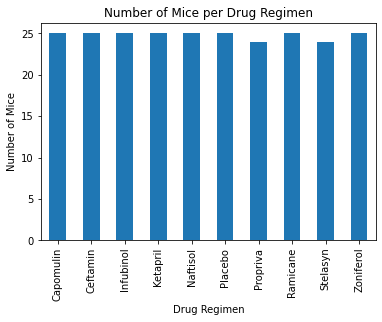

In [18]:
# Generate bar plot using Pandas.

# Use DataFrame.plot() in order to create a bar chart of the data
mouse_drug_df.plot(kind="bar", legend = False)

# Set a title for the chart and add y label 
plt.title("Number of Mice per Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


Text(0, 0.5, 'Number of Mice')

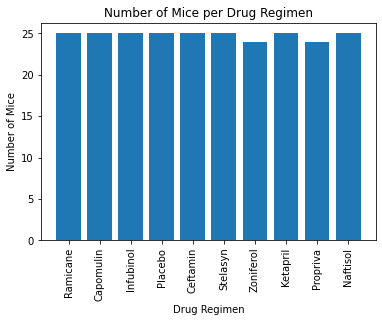

In [19]:
# Generate bar plot using Matplotlib.
x_axis = mouse_df["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]

plt.bar(x_axis, mouse_drug_df['Mouse ID'])

plt.xticks(tick_locations,x_axis, rotation="vertical")
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

In [20]:
# Calculating Gender.
mouse_gender = mouse_df.groupby("Sex").nunique()['Mouse ID']
mouse_gender


Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64

In [21]:
# Calculating gender percentage.
gender_percent = mouse_gender/(mouse_df.groupby("Sex").nunique()['Mouse ID'].sum())*100
gender_percent

Sex
Female    49.596774
Male      50.403226
Name: Mouse ID, dtype: float64

In [22]:
# creating DataFrame from gathered values.
mouse_gender_df = pd.DataFrame({"Mouse ID": mouse_gender,
                                "Percentage":gender_percent
                               })
mouse_gender_df

,Mouse ID,Percentage
Sex,,
Female,123,49.596774
Male,125,50.403226


Text(0.5, 1.0, 'Percentage of Mouse Gender in Trial')

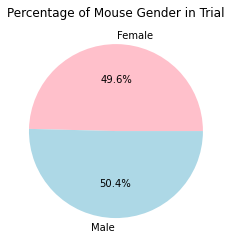

In [23]:
# Pie Plot using Matplotlib.
labels = ["Female","Male"] #mouse_df.groupby("Sex").nunique()
sizes = mouse_gender_df['Percentage']
colors = ["pink", "lightblue"]
explode = (0,0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct= "%1.1f%%")

plt.title("Percentage of Mouse Gender in Trial")

Text(0.5, 1.0, 'Percentage of Mouse Gender in Trial')

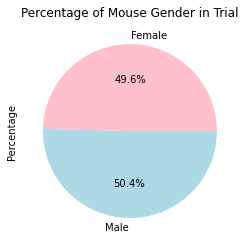

In [24]:
#Pie Plot using Pandas.
mouse_gender_df.plot(kind="pie", y="Percentage", legend=False, colors=colors,autopct= "%1.1f%%")

# Set a title for the chart and add y label 
plt.title("Percentage of Mouse Gender in Trial")


In [25]:
# Calculate the final tumor volume of each mouse across all of the treatment regimens

# Getting the last (greatest) timepoint for each mouse
mouse_max_df = pd.DataFrame(mouse_df.groupby('Mouse ID').max()['Timepoint'])
#mouse_max_df = pd.DataFrame(mouse_df.groupby('Mouse ID'))#['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tvolfinal_df=pd.merge(mouse_df, mouse_max_df, on=("Mouse ID","Timepoint"))
tvolfinal_df #.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [26]:
tvolfinal_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            248 non-null    object 
 1   Drug Regimen        248 non-null    object 
 2   Sex                 248 non-null    object 
 3   Age_months          248 non-null    int64  
 4   Weight (g)          248 non-null    int64  
 5   Timepoint           248 non-null    int64  
 6   Tumor Volume (mm3)  248 non-null    float64
 7   Metastatic Sites    248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 17.4+ KB


In [27]:
# Pull out the final tumor volume for each of the four treatments listed and place in a new list: "tumor_vol_list"
four_drugs= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_list = []
             
# For loop to create box plots for the 4 requested drugs:
for drug in four_drugs:
    final_tumor_vol = tvolfinal_df.loc[tvolfinal_df["Drug Regimen"] == drug,'Tumor Volume (mm3)']
    tumor_vol_list.append(final_tumor_vol)

#tumor_vol_list

In [28]:
for index in range(0,len(four_drugs)):
    quartiles=tumor_vol_list[index].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(four_drugs[index])
    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range is: {iqr}")
    print(f"The the median is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.\n\n\n")

Capomulin
The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The the median is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.



Ramicane
The lower quartile is: 31.56046955
The upper quartile is: 40.65900627
The interquartile range is: 9.098536719999998
The the median is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.



Infubinol
The lower quartile is: 54.04860769
The upper quartile is: 65.52574285
The interquartile range is: 11.477135160000003
The the median is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.



Ceftamin
The lower quartile is: 48.72207785
The upper quartile is: 64.29983003
The interquartile range is: 15.577752179999997
The the median is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 

(array([1, 2, 3, 4]), <a list of 4 Text major ticklabel objects>)

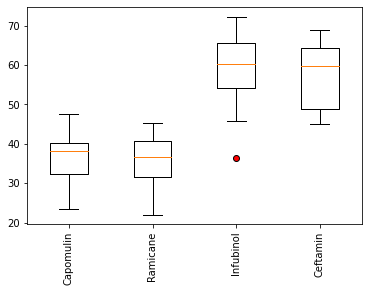

In [29]:
plt.boxplot(tumor_vol_list,labels=four_drugs,flierprops={
    'markerfacecolor':'red'
})
plt.xticks(rotation=90)

In [37]:
tumor_vol_list[2]

49     67.973419
50     65.525743
57     57.031862
58     66.083066
70     72.226731
74     36.321346
82     60.969711
90     62.435404
95     60.918767
111    67.289621
123    66.196912
127    62.117279
145    47.010364
149    60.165180
161    55.629428
162    45.699331
173    54.656549
184    55.650681
205    46.250112
208    54.048608
210    51.542431
217    50.005138
222    58.268442
236    67.685569
245    62.754451
Name: Tumor Volume (mm3), dtype: float64

In [30]:
mouse_df[mouse_df['Mouse ID']=="x401"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
20,x401,Capomulin,Female,16,15,0,45.000000,0
21,x401,Capomulin,Female,16,15,5,45.473753,0
22,x401,Capomulin,Female,16,15,10,39.113891,0
23,x401,Capomulin,Female,16,15,15,39.776250,0
24,x401,Capomulin,Female,16,15,20,36.065835,0
25,x401,Capomulin,Female,16,15,25,36.617120,0
26,x401,Capomulin,Female,16,15,30,32.915292,0
27,x401,Capomulin,Female,16,15,35,30.206825,0
28,x401,Capomulin,Female,16,15,40,28.167397,0
29,x401,Capomulin,Female,16,15,45,28.484033,0
